In [1]:
!pip install langgraph langsmith

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.4/142.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 18.0 MB/s eta 0:00:00


In [2]:
!pip install langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.3/423.3 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.49
    Uninstalling langchain-core-0.3.49:
      Successfully uninstalled langchain-core-0.3.49
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.7
    Uninstalling langchain-text-splitters-0.3.7:
      Successfully uninstalled langchain-text-splitters-0.3.7
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.22
    Uninstalling langchain-0.3.22:
      Successfully uninstalled langchain-0.3.22


In [4]:
from google.colab import userdata
groq_api_key = userdata.get('groq_api_key')
langsmith=('LANGSMITH_API_KEY')

In [6]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "CourseLanggraph"

In [7]:
from langchain_groq import ChatGroq

In [9]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="deepseek-r1-distill-qwen-32b")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7dfccb76c690>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7dfccb76f390>, model_name='deepseek-r1-distill-qwen-32b', model_kwargs={}, groq_api_key=SecretStr('**********'))

 # Start Building ChatBot Using Langgraph

In [10]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [11]:
class State(TypedDict):
    messages: list[list,add_messages]
graph_builder=StateGraph(State)

In [12]:
graph_builder=StateGraph(State)

In [13]:
graph_builder

In [14]:
def chatbot(state:State):
  return {"messages":llm.invoke(state["messages"])}

In [15]:
graph_builder.add_node("chatbot",chatbot)

In [16]:
graph_builder

In [17]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [18]:
graph=graph_builder.compile()

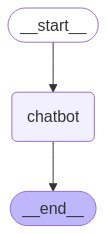

In [19]:
from IPython.display import display,Image
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [20]:
while True:
  user_input=input("User : ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value["messages"])
      print("Assistant : ",value["messages"].content)

User : What is Generative Ai?


dict_values([{'messages': AIMessage(content="<think>\nOkay, so I need to figure out what Generative AI is. I've heard the term before, especially with things like ChatGPT or DALL-E. But I'm not entirely sure how it all works. Let me try to break it down step by step.\n\nFirst, AI stands for Artificial Intelligence, which is about machines performing tasks that typically require human intelligence. But Generative AI must be a specific subset of that. I remember hearing that it's about creating something, like generating content. So maybe it's about machines creating text, images, or other media.\n\nI think it involves machine learning, which is a part of AI where models learn from data. But how does that lead to generation? I guess it's about training models on a lot of data so they can understand patterns and then use that understanding to create new content. So if you train a model on lots of text, it can write new sentences, right?\n\nI remember something about neural networks, espec

User : q
Good Bye
